In [48]:
import numpy as np
import matplotlib.pyplot as plt

# p105

\begin{align}
y_n &= \boldsymbol{w}^T\boldsymbol{x}_n + \epsilon_n \\
\epsilon_n &\sim \mathcal{N} (\epsilon_n \  | \  0, \lambda^{-1}) \\
p(y_n\ |\ \boldsymbol{w}_n, \boldsymbol{x}_n ) 
&\sim \mathcal{N} (y_n \  | \  \boldsymbol{w}^T\boldsymbol{x}_n, \epsilon_n) \\
p(\boldsymbol{w}) &= \mathcal{N} ( \boldsymbol{w}  | \  \boldsymbol{m}, \Lambda^{-1}) \\
\end{align}

ハイパーパラメータは $\lambda^{-1}, \boldsymbol{m}, \Lambda^{-1}$

In [49]:
rand_epsilon = np.random.RandomState(seed=0)
rand_w = np.random.RandomState(seed=1)

In [50]:
dim = 4
x = np.arange(-1, 1.01, 0.01)
X = np.array([[1]*len(x), x, x**2, x**3])

In [51]:
r_lambda_epsilon = 10.0  # precision
epsilon = rand_epsilon.normal(0, r_lambda_epsilon**(-1), size=len(X))  # epsilon dist
m, r_lambda_w = np.zeros(dim), np.identity(dim)
w = rand_w.multivariate_normal(m, r_lambda_w, size=1)

# plot

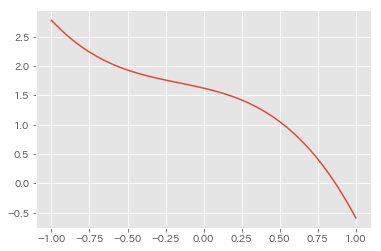

In [52]:
y = np.dot(w, X)
plt.plot(x, y[0])

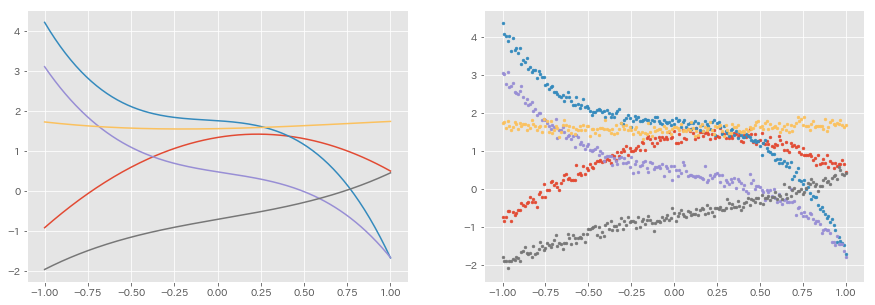

In [53]:
plt.style.use("ggplot")


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(15, 5))
for seed in range(5):
    rand_y = np.random.RandomState(seed=seed)
    rand_w = np.random.RandomState(seed=seed+10)
    r_lambda_epsilon = 1/10.0  # precision
    m, r_lambda_w = np.zeros(dim), np.identity(dim)  # hyper parameters

    w = rand_w.multivariate_normal(m, r_lambda_w, size=1)
    
    f = np.dot(w, X)
    axes[0].plot(x, f[0])
    y = rand_y.normal(f, r_lambda_epsilon)
    """
    for i in range(len(X)):
        print(rand_y.normal(f, r_lambda_epsilon))
        y.append(rand_y.normal(f, r_lambda_epsilon))
    """
    axes[1].scatter(x, y[0], s=8)

# p108

予測分布は以下の通り

\begin{align}
    p(y_{\ast}|\boldsymbol{x}_{\ast}, \boldsymbol{Y}, \boldsymbol{X})
    &= \mathcal{N}(y_{\ast}|\mu_{\ast}, \lambda_{\ast}^{-1}) \\
    \text{ただし} \\
    \mu_{\ast} &= \hat{\boldsymbol{m}}^T\boldsymbol{x}_{\ast} \\
    \lambda_{\ast}^{-1} &= \lambda^{-1} + \boldsymbol{x}^T_{\ast}\hat{\Lambda}^{-1}\boldsymbol{x}_{\ast} \\
    \text{また，} \\
    \hat{\Lambda} &= \lambda \sum_{n=1}^N  \boldsymbol{x} \boldsymbol{x}^T_n + \Lambda\\
    \hat{\boldsymbol{m}} &= \hat{\Lambda}^{-1} \left(
    \lambda \sum_{n=1}^N y_n\boldsymbol{x}_n + \Lambda \boldsymbol{m}
    \right)
\end{align}

## データの作成

In [117]:
seed = 2018053
np.random.seed(seed)
x_range=np.linspace(-3, 3, 1000)
Y = np.sin(x_range) + np.random.normal(loc=0, scale=0.1, size=len(x_range))
Y.shape

(1000,)

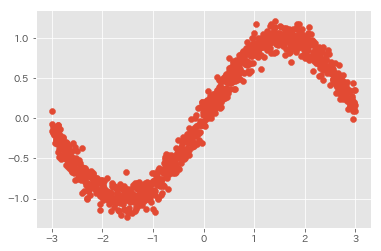

In [118]:
plt.scatter(x_range, Y)

## ハイパーパラメータの設定

In [119]:
np.arange(9)**0

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [120]:
X = np.array([x_range**0, x_range, x_range**2, x_range**3]).T
X.shape

(1000, 4)

In [121]:
r_lambda = 1/10
dim = 4  # yがxの4時多項式に従うと仮定
m, Lambda = np.zeros(dim), np.identity(dim)  # setting hyper parameters

In [122]:
Lambda_hat = 1/r_lambda * np.dot(X.T, X) + Lambda

In [123]:
tmp = 1/r_lambda * np.sum((Y.reshape(-1, 1)*X), axis=0) + np.dot(Lambda, m)
m_hat = np.dot(np.linalg.inv(Lambda_hat), tmp)

In [124]:
x_new = np.linspace(-3, 3, 1000)
X_new = np.array([x_new**0, x_new**1, x_new**2, x_new**3]).T
mu_ast = np.dot(m_hat, X_new.T)
tmp = np.dot(X_new, np.linalg.inv(Lambda_hat))
r_lambda_ast = r_lambda + np.diag(tmp.dot(X_new.T))

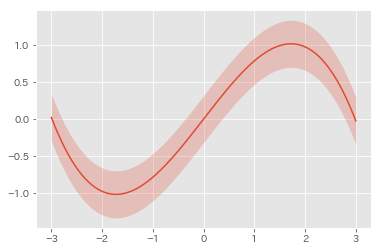

In [125]:
plt.plot(x_new, mu_ast)
plt.fill_between(
    x_new,
    mu_ast + np.sqrt(r_lambda_ast),
    mu_ast - np.sqrt(r_lambda_ast),
    alpha=0.25)

# p109の図を模倣